## Assignment - 5
## Developing and Testing K - Means Clustering Algorithm 

* In this assignment we will first develop the code for K - Means Algorithm.
* We will then perform validity of K Means using various validity Measures
* Visualize the clusters for 2-Dimensional data
* Use cluster model on the Wine Data Set.
* This code will provide a csv file for dataset 1(K = 4) and wine dataset (K = 9)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import seaborn as sns
import pandas as pd

### K - Means Algorithm 

In [2]:
# We are defining a class with a constructor which takes k, tol and max_iter. tol is the amount by which
# our centroid should stop moving. 
class K_means:
    def __init__(self, k = 2, tol = 0.01, max_iter = 300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter 
        
        
    def fit(self,data):
        self.centroids = {}
        
        # Initiating centroids to first four data points. We can also pick k random centroids from the data.
        for i in range(self.k):
            self.centroids[i] = data[3*i]
            
        
        # In this for loop, we will initiate an empty dictionary for classification
        for i in range(self.max_iter):
            self.classifications = {}
            self.indexing = []
            
            # Once we initated an empty dictionary, we will limit the size of classifications dictionary to k.
            for i in range(self.k):
                self.classifications[i] = []
                
            
            # Calculating distances between the centroid and each data point and then classify them into k clusters
            a = 0
            for featureset in data:
                a = a + 1
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                self.indexing.append([a, classification])
            
            # Storing the centroid point of this iteration.
            prev_centroids = dict(self.centroids)
            
          
            # Once stored, we will update the centroid of the currently formed clusters 
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
                
                
            optimized = True
            
            # Checking for difference in movement of centroid for each iteration. 
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0)>self.tol:
                    optimized = False
            
            if optimized:
                break
        
        
        
        # Calculating SSE
        self.sse = {}
        for i in range(self.k):
            self.sse[i] = []
            
        for classification in self.classifications:
            SSE = 0
            for record in self.classifications[classification]:
                squared_dist = np.square(np.linalg.norm(record - self.centroids[classification]))
                SSE = squared_dist + SSE
            self.sse[classification].append(SSE)
            
            
        #Calculating SSB    
        
        self.ssb = {}
        list_of_centroid = []
        for i in range(self.k):
            self.ssb[i] = []
            list_of_centroid.append(self.centroids[i])
        
        self.centre = np.average(list_of_centroid, axis = 0)
        for point in range(self.k):
            SSB = 0
            for i in self.centroids[point]:
                squar_dist = np.square(np.linalg.norm(i - self.centre))
                SSB = squar_dist + SSB
            self.ssb[point].append(SSB)
            
            
            
    # Given a point it will predict the cluster which it belongs to        
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#### SSB AND SSE (True Clusters)
* Before plotting scattplots, we will calculate the SSE and SSB of true clusters

In [3]:
df = pd.read_csv("TwoDimHard.csv")
actual = df["cluster"]
df.drop("ID",axis = 1,inplace=True)

In [4]:
df["cluster"].value_counts()

4    114
2    100
3     97
1     89
Name: cluster, dtype: int64

In [5]:
# We are spliiting the dataframe by each cluster and calulating its center
value_1 = df.iloc[:89,:2]
cent_1 = np.average(value_1[["X.1","X.2"]], axis = 0)
value_2 = df.iloc[89:90+99,:2]
cent_2 = np.average(value_2[["X.1","X.2"]], axis = 0)
value_3 = df.iloc[90+99:90+99+97,:2]
cent_3 = np.average(value_3[["X.1","X.2"]], axis = 0)
value_4 = df.iloc[90+99+97:400,:2]
cent_4 = np.average(value_4[["X.1","X.2"]], axis = 0)
cent = np.average((cent_1,cent_2,cent_3,cent_4), axis = 0)

In [6]:
# For each dataframe that we split, we will calculate the ssb and sse of each true cluster

sse_1 = 0
for i in np.array(value_1):
    squared_dist_1 = np.square(np.linalg.norm(i - cent_1))
    sse_1 = squared_dist_1 + sse_1
    ssb_1 = np.linalg.norm(cent_1 - cent)
sse_2 = 0
for i in np.array(value_2):
    squared_dist_2 = np.square(np.linalg.norm(i - cent_2))
    sse_2 = squared_dist_2 + sse_2
    ssb_2 = np.linalg.norm(cent_2 - cent)
sse_3 = 0
for i in np.array(value_3):
    squared_dist_3 = np.square(np.linalg.norm(i - cent_3))
    sse_3 = squared_dist_3 + sse_3
    ssb_3 = np.linalg.norm(cent_3 - cent)
    sse_4 = 0
for i in np.array(value_4):
    squared_dist_4 = np.square(np.linalg.norm(i - cent_4))
    sse_4 = squared_dist_4 + sse_4
    ssb_4 = np.linalg.norm(cent_4 - cent)
print("Sum of Squared Error for true Cluster 1,2,3 and 4 are : ", sse_1,sse_2,sse_3,sse_4)
print("Sum of Squared distances Between true Cluster 1,2,3 and 4 are : ", ssb_1,ssb_2,ssb_3,ssb_4)

Sum of Squared Error for true Cluster 1,2,3 and 4 are :  0.312847717977 0.902533615622 2.43011871823 1.91071546635
Sum of Squared distances Between true Cluster 1,2,3 and 4 are :  0.291478704933 0.162210635131 0.234325788477 0.27055830502


#### Performing K - Means on TwoDimHard Data

In [7]:
df = pd.read_csv("TwoDimHard.csv")
actual = df["cluster"]
df.drop("ID",axis = 1,inplace=True)

In [8]:
df.head()

,X.1,X.2,cluster
0,0.276724,0.793762,1
1,0.346407,0.797695,1
2,0.296033,0.845381,1
3,0.333519,0.774505,1
4,0.347625,0.737573,1


In [9]:
arr = np.asarray(df[["X.1","X.2"]])

#### Scatter Plot of K means clusters
* Once we fit the data, we will plot the scatter plot of clusters formed with K - Means and we will compare with the clusters labelled from the data.

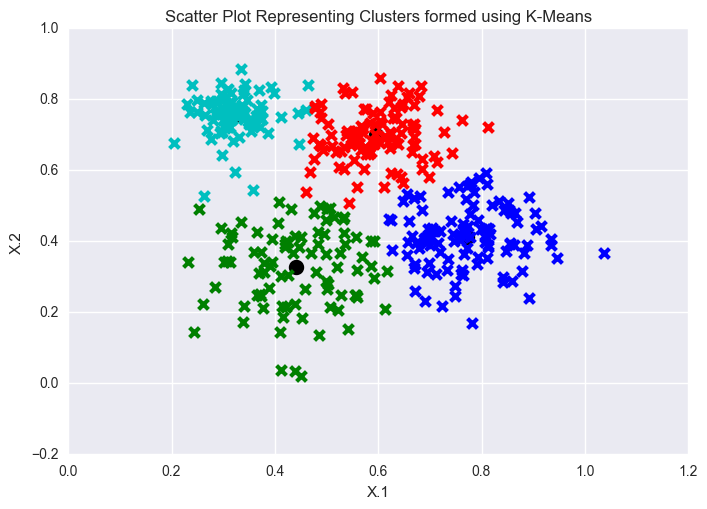

In [10]:
clf_df = K_means(k=4)
clf_df.fit(arr)
colors = 10*["c","r","b","g","k"]
for centroid in clf_df.centroids:
    plt.scatter(clf_df.centroids[centroid][0], clf_df.centroids[centroid][1], marker = 'o', color = 'k', s =50, linewidths = 4)
for classification in clf_df.classifications:
    color = colors[classification]
    for featureset in clf_df.classifications[classification]:
        plt.scatter(featureset[0], featureset[1],marker ='x', c = color, s = 50, linewidths = 3)
plt.xlabel("X.1")
plt.ylabel("X.2")
plt.title('Scatter Plot Representing Clusters formed using K-Means')            
plt.show()

#### Scatter Plot from given Data

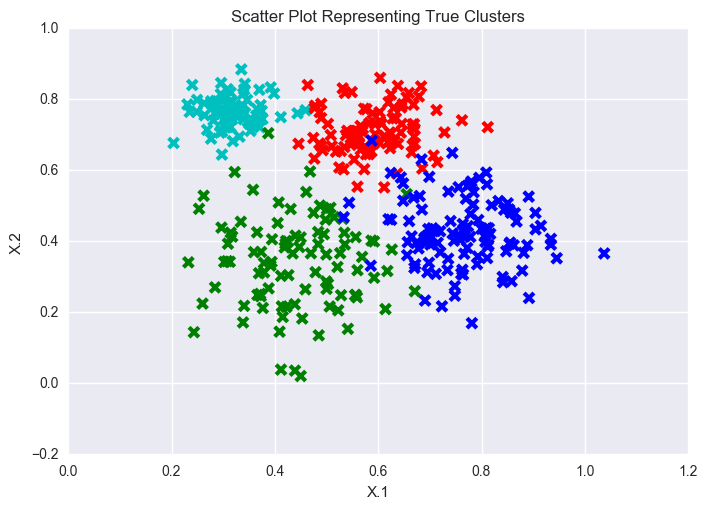

In [11]:
colors = np.where(df["cluster"]==1,'c','-')
colors[df['cluster'] == 2] ='r'
colors[df['cluster'] == 3] ='g'
colors[df['cluster'] == 4] ='b'
sns.plt.scatter(df["X.1"],df["X.2"], c = colors, marker='x', s= 50, linewidths=3)
plt.xlabel("X.1")
plt.ylabel("X.2")
plt.title('Scatter Plot Representing True Clusters')
# plt.legend(['Scatter Plot Representing True Clusters'])
plt.show()

* As we can see from the scatter plots that both clusters almost look the same except a little overlap

### Output for Dataset 1 when K = 4
* This block of code will provide you output for data set 1 when k = 4

In [12]:
out1 = pd.DataFrame(clf_df.indexing, columns=["RowID", "Cluster"])
out1.ix[:,['Cluster']] += 1
out1.to_csv("out for dataset1.csv")

#### SSE and SSB ( K Means)
* These are the values of SSB and SSE for the clusters formed by our model

In [13]:
clf_df.sse

{0: [0.50048057514813582],
 1: [1.0764850881678978],
 2: [1.4705341945503396],
 3: [1.8446030116907743]}

In [14]:
clf_df.ssb

{0: [0.18738161693375188],
 1: [0.055894958965910277],
 2: [0.14133819725437505],
 3: [0.11169120514557687]}

#### Cross - Tabulation Matrix
* Matrix formed by our true clusters and clusters formed by our model. This will help us to understand the purity of each cluster.

In [15]:
pred = pd.DataFrame(data = np.sort(clf_df.indexing, axis = 0), columns = ["ID","Pred_cluster"])
final_df = pd.concat((pred, df.iloc[:,2]), axis = 1)
final_df.ix[:,['Pred_cluster']] += 1
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(final_df['cluster'], final_df["Pred_cluster"])
cm
df_confusion = pd.crosstab(final_df["Pred_cluster"], final_df["cluster"] )

In [16]:
df_confusion

cluster,1,2,3,4
Pred_cluster,,,,
1,89,6,0,0
2,0,94,14,0
3,0,0,83,24
4,0,0,0,90


#### K - means clustering (K=3)
* We will perform K Means clustering for K = 3 and compare with values when K = 4

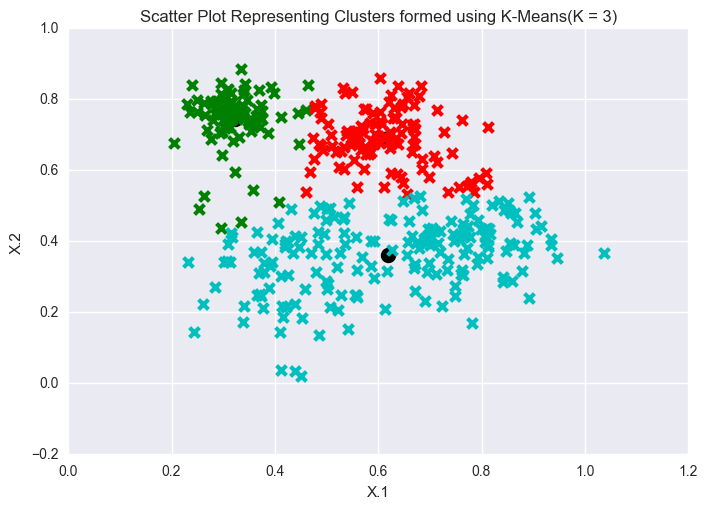

In [17]:
clf = K_means(k=3)
clf.fit(arr)
colors = 10*["g","r","c","b","k"]
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker = 'o', color = 'k', s =50, linewidths = 4)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1],marker ='x', c = color, s = 50, linewidths = 3)
plt.xlabel("X.1")
plt.ylabel("X.2")
plt.title('Scatter Plot Representing Clusters formed using K-Means(K = 3)')            
plt.show()

* As you can see, the two cluster in the bottom section completely merged into one cluster

#### SSE and SSB (K = 3)

In [18]:
clf.sse

{0: [0.82064805079451753], 1: [1.5119734661947009], 2: [8.0678813734102341]}

In [19]:
clf.ssb

{0: [0.18620868156197545],
 1: [0.045848011013337388],
 2: [0.091015462943230763]}

* We also notice that SSE has increased and SSB decreased when K = 3. This implies clusters are loosely based and they are not so distant and independent

##### Tabulation Matrix

In [20]:
pred = pd.DataFrame(data = np.sort(clf.indexing, axis = 0), columns = ["ID","Pred_cluster"])
final_df = pd.concat((pred, df.iloc[:,2]), axis = 1)
final_df.ix[:,['Pred_cluster']] += 1
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(final_df['cluster'], final_df["Pred_cluster"])
cm
df_confusion = pd.crosstab(final_df["Pred_cluster"], final_df["cluster"] )

* As we can see, the true clusters 1 and 2 merged into just one cluster i.e. the cluster 1.

In [21]:
df_confusion

cluster,1,2,3,4
Pred_cluster,,,,
1,89,10,0,0
2,0,90,27,0
3,0,0,70,114


### Wine Data Set
* We will apply our algorithm to wine data set

In [22]:
wine = pd.read_csv("wine.csv")
quality = wine.iloc[:,12]

In [23]:
wine = wine.iloc[:,0:-2]

In [24]:
wine.head()
wine.drop("ID", axis = 1, inplace=True)

In [25]:
from sklearn.preprocessing import scale
wine = scale(wine)
wine = np.asarray(wine)

#### SSE and SSB 
* We will vary the values of k and check for our SSE and SSB values

In [26]:
clf = K_means(k = 5)
clf.fit(wine)

In [27]:
clf.sse

{0: [1992.5560634621613],
 1: [2444.3908642986612],
 2: [1803.1436339160864],
 3: [2389.9207179114037],
 4: [1957.5987863851865]}

In [28]:
clf.ssb

{0: [40.254477930347093],
 1: [59.317483106295391],
 2: [31.948008586113978],
 3: [196.86561996140284],
 4: [62.598403945347414]}

* We will plot histograms and visually observed the whether the value of K seem to have any effect on SSE and SSB

* Histogram for SSE and SSB when K = 5

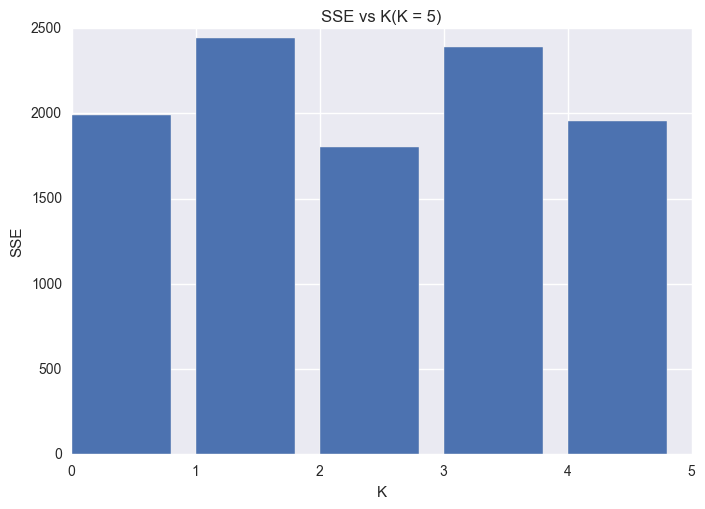

In [29]:
l_5e = list(clf.sse.values())
flat_list = []
for sublist in l_5e:
    for item in sublist:
        flat_list.append(item)
plt.bar(range(clf.k), flat_list )
plt.title("SSE vs K(K = 5)")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

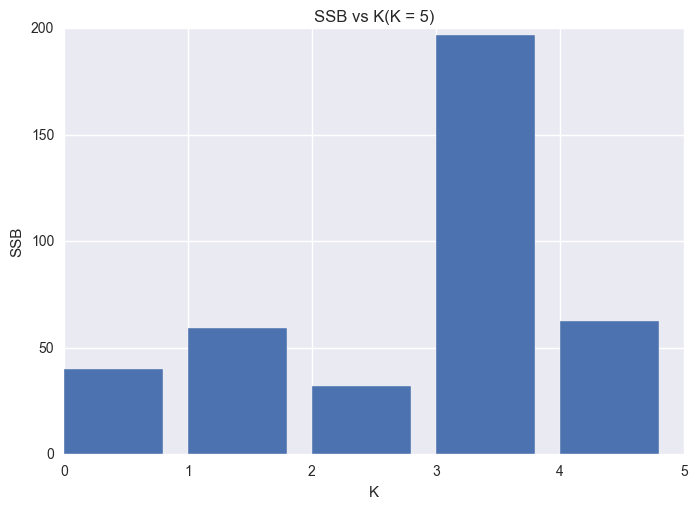

In [30]:
l_5b = list(clf.ssb.values())
flat_list = []
for sublist in l_5b:
    for item in sublist:
        flat_list.append(item)
plt.bar(range(clf.k), flat_list )
plt.title("SSB vs K(K = 5)")
plt.xlabel("K")
plt.ylabel("SSB")
plt.show()

In [31]:
clf = K_means(k=7)
clf.fit(wine)

In [32]:
clf.sse

{0: [1773.7623686008619],
 1: [1598.6405800739335],
 2: [1656.5367558700598],
 3: [755.8272625744562],
 4: [1320.7016135654105],
 5: [462.32348498496583],
 6: [1281.2858678123728]}

* Histogram for SSE and SSB when K = 7

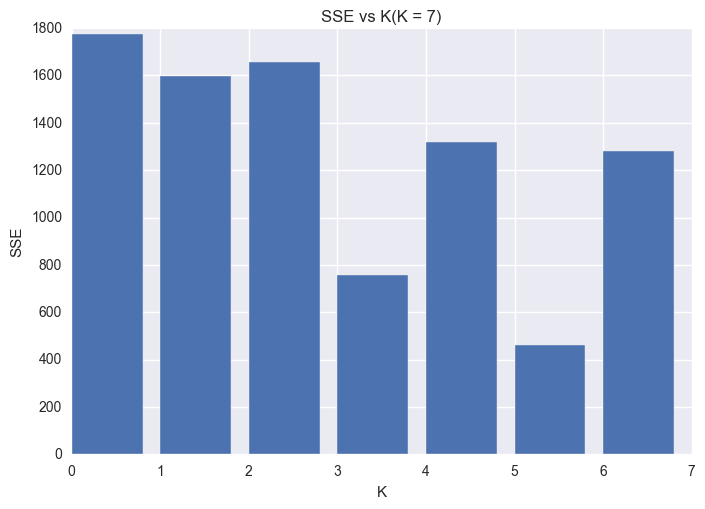

In [33]:
l_7e = list(clf.sse.values())
flat_list = []
for sublist in l_7e:
    for item in sublist:
        flat_list.append(item)
plt.bar(range(clf.k), flat_list )
plt.title("SSE vs K(K = 7)")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [34]:
clf.ssb

{0: [69.133546081284678],
 1: [86.159818285408747],
 2: [41.840053033067022],
 3: [252.74733162131056],
 4: [67.100437353755126],
 5: [535.75073517818123],
 6: [43.733633754278692]}

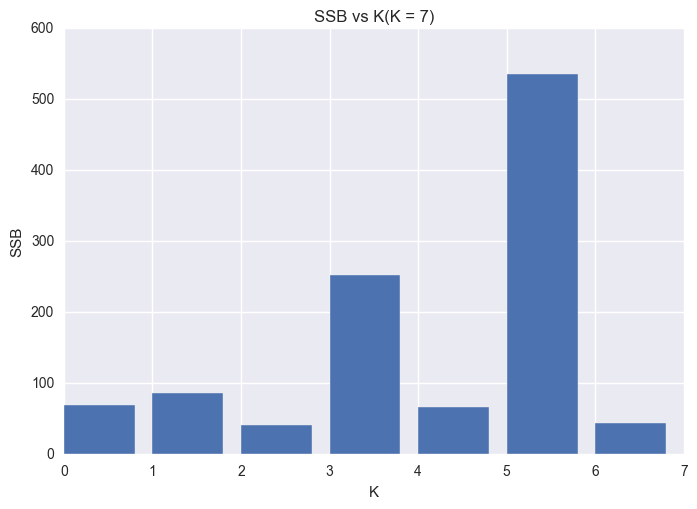

In [35]:
l_7b = list(clf.ssb.values())
flat_list = []
for sublist in l_7b:
    for item in sublist:
        flat_list.append(item)
plt.bar(range(clf.k), flat_list )
plt.title("SSB vs K(K = 7)")
plt.xlabel("K")
plt.ylabel("SSB")
plt.show()

In [36]:
clf_9 = K_means(k=9)
clf_9.fit(wine)

In [37]:
clf_9.sse

{0: [1411.4685705465245],
 1: [1256.7367912788513],
 2: [912.30337789202667],
 3: [745.90632098889057],
 4: [716.18340332647676],
 5: [428.32123086374742],
 6: [821.45753986487205],
 7: [900.10681748237459],
 8: [775.70387776904204]}

* Histogram for SSE and SSB when K = 9

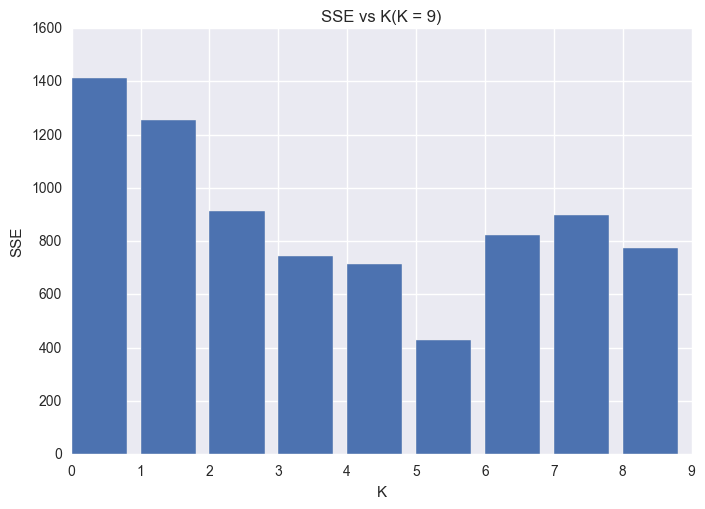

In [38]:
l_9e = list(clf_9.sse.values())
flat_list = []
for sublist in l_9e:
    for item in sublist:
        flat_list.append(item)
plt.bar(range(clf_9.k), flat_list )
plt.title("SSE vs K(K = 9)")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [39]:
clf_9.ssb

{0: [50.779935073068359],
 1: [96.237557618773778],
 2: [50.222780260951147],
 3: [259.23007556696945],
 4: [121.24716643420999],
 5: [557.39770347604542],
 6: [31.082169016820853],
 7: [35.363442308429462],
 8: [63.440803094354692]}

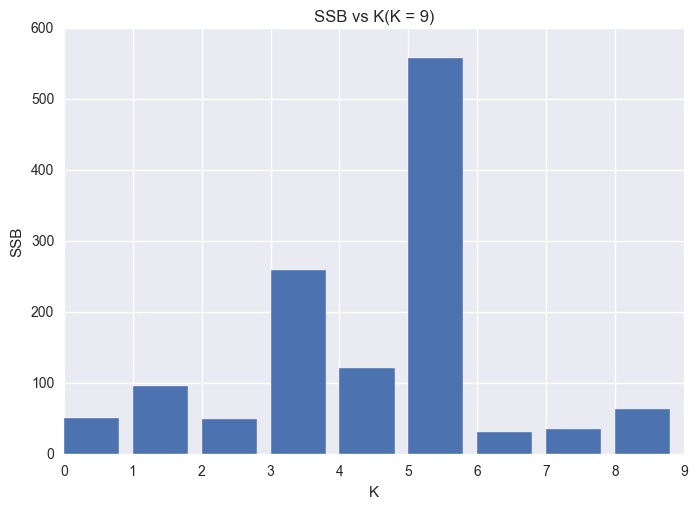

In [40]:
l_9b = list(clf_9.ssb.values())
flat_list = []
for sublist in l_9b:
    for item in sublist:
        flat_list.append(item)
plt.bar(range(clf_9.k), flat_list )
plt.title("SSB vs K(K = 9)")
plt.xlabel("K")
plt.ylabel("SSB")
plt.show()

* From all these histograms and values of SSE and SSB we observe that as we increase K, SSE decreases and SSB increases. This implies the clusters become tighter and tighter.

### Output for wine Dataset (K = 9)

In [41]:
out2 = pd.DataFrame(clf_9.indexing, columns=["RowID", "Cluster"])
out2.ix[:,['Cluster']] += 1
out2.to_csv("output wine dataset.csv")

#### Cross-Tabulation Matrix in comparison with quality attribute
* We will us quality attribute as external index

In [42]:
clf = K_means(k = 5)
clf.fit(wine)
pred = pd.DataFrame(data = np.sort(clf.indexing, axis = 0), columns = ["ID","Pred_cluster"])
final_df = pd.concat((pred, quality), axis = 1)
final_df.ix[:,['Pred_cluster']] += 1
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(final_df['quality'], final_df["Pred_cluster"])
cm
df_confusion = pd.crosstab(final_df["Pred_cluster"], final_df["quality"] )

In [43]:
df_confusion

quality,3,4,5,6,7,8
Pred_cluster,,,,,,
1,1,16,238,177,49,6
2,3,14,191,140,39,4
3,1,5,91,162,89,4
4,1,8,26,34,1,1
5,4,10,135,125,21,3


* We can clearly see that none of the clusters are pure

### Off-The-Shelf Implementation

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=4, tol=0.01)
kmeans.fit(arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.01, verbose=0)

In [46]:
kmeans.cluster_centers_

array([[ 0.77289734,  0.41198897],
       [ 0.59580368,  0.69767513],
       [ 0.44101165,  0.32613108],
       [ 0.32221294,  0.75482519]])

In [47]:
kmeans.inertia_

4.8921028695571476

In [57]:
clf = K_means(k=4)
clf.fit(arr)
clf.centroids

{0: array([ 0.32221294,  0.75482519]),
 1: array([ 0.59580368,  0.69767513]),
 2: array([ 0.77289734,  0.41198897]),
 3: array([ 0.44101165,  0.32613108])}

* The cluster centroids are all same

* Scatter Plot of the clusters formed by the ots classifier. The clusters seem to be similar to the actual dataset

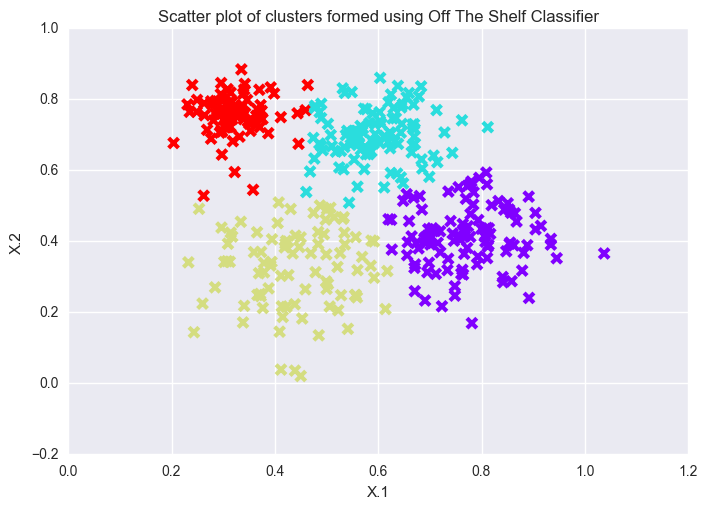

In [61]:
sns.plt.scatter(df["X.1"],df["X.2"], c = kmeans.labels_, cmap = 'rainbow', marker='x', s= 50, linewidths=3)
plt.title("Scatter plot of clusters formed using Off The Shelf Classifier")
plt.xlabel("X.1")
plt.ylabel("X.2")
plt.show()

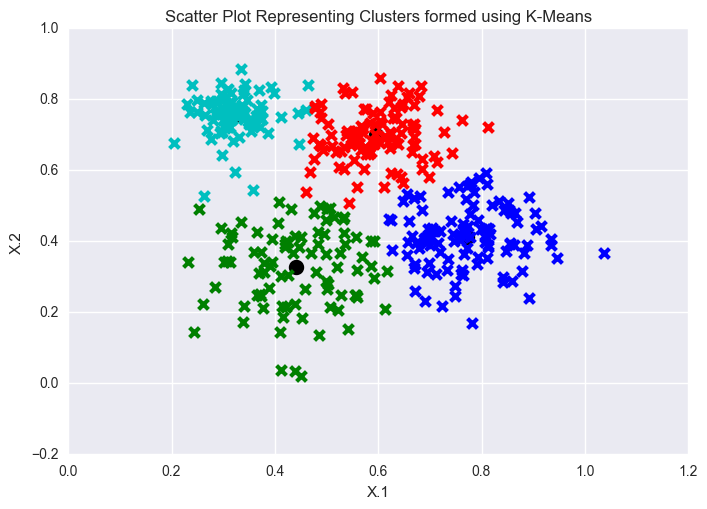

In [62]:
clf = K_means(k=4)
clf.fit(arr)
colors = 10*["c","r","b","g","k"]
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker = 'o', color = 'k', s =50, linewidths = 4)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1],marker ='x', c = color, s = 50, linewidths = 3)
plt.xlabel("X.1")
plt.ylabel("X.2")
plt.title('Scatter Plot Representing Clusters formed using K-Means')            
plt.show()

#### Fitting the wine data set

In [51]:
clf_wine = KMeans(n_clusters = 6,random_state= 10, tol=0.01)
clf_wine.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.01, verbose=0)

In [52]:
clf_wine.cluster_centers_

array([[-0.69291883, -0.43788718, -0.14749883, -0.25775959, -0.41704416,
         0.1245333 , -0.22950446, -1.24647482,  0.6336351 ,  0.13500803,
         1.29557245],
       [-0.47678245,  0.69075269, -0.82992385, -0.19085938, -0.06160093,
        -0.4329572 , -0.41720149, -0.05725413,  0.42032148, -0.39534949,
        -0.4192946 ],
       [ 1.34036793, -0.67782346,  1.12979297,  0.07674011, -0.00903749,
        -0.5670922 , -0.54382698,  0.76433736, -0.8461275 ,  0.33557746,
         0.18107276],
       [-0.18863726, -0.05158305,  0.40021232,  4.24475937,  0.20631777,
         1.58986899,  1.7422233 ,  1.03540201, -0.19454835,  0.08533204,
        -0.31541892],
       [ 0.08183134,  0.01795477,  1.14417813, -0.39939594,  5.60473128,
        -0.070479  ,  0.47441556,  0.18580277, -1.68735655,  3.72060836,
        -0.88256287],
       [-0.05814723,  0.0466059 ,  0.06356091, -0.09944399, -0.03104105,
         0.98415931,  1.18761815,  0.23019438, -0.1458027 , -0.19838497,
        -0.590

In [53]:
clf_wine.inertia_

9364.9494775366657

In [54]:
clf = K_means(k = 6,tol = .01)
clf.fit(wine)

In [55]:
clf.centroids

{0: array([-0.47951907,  0.69151029, -0.83100196, -0.19036155, -0.0614167 ,
        -0.43253121, -0.41715832, -0.05801983,  0.42334578, -0.39488864,
        -0.41844625]),
 1: array([ 1.33485049, -0.67205294,  1.12315282,  0.07325309, -0.00787772,
        -0.56758733, -0.54350774,  0.76204658, -0.84561354,  0.34657123,
         0.17430461]),
 2: array([-0.05814723,  0.0466059 ,  0.06356091, -0.09944399, -0.03104105,
         0.98415931,  1.18761815,  0.23019438, -0.1458027 , -0.19838497,
        -0.59063791]),
 3: array([-0.18863726, -0.05158305,  0.40021232,  4.24475937,  0.20631777,
         1.58986899,  1.7422233 ,  1.03540201, -0.19454835,  0.08533204,
        -0.31541892]),
 4: array([-0.69291883, -0.43788718, -0.14749883, -0.25775959, -0.41704416,
         0.1245333 , -0.22950446, -1.24647482,  0.6336351 ,  0.13500803,
         1.29557245]),
 5: array([  9.54162998e-02,   2.19980305e-03,   1.18155266e+00,
         -3.89872163e-01,   5.78475973e+00,  -4.95156003e-02,
          5.1

In [63]:
clf.sse

{0: [0.50048057514813582],
 1: [1.0764850881678978],
 2: [1.4705341945503396],
 3: [1.8446030116907743]}

* Centroids seem to be very similar and total SSE also is almost equal